## Observations and Insights 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.DataFrame.merge(mouse_metadata, study_results, on="Mouse ID")
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Checking the number of mice in the DataFrame.
df['Mouse ID'].value_counts()

g989    13
b128    10
o562    10
o795    10
j119    10
s710    10
x401    10
j296    10
c302    10
x581    10
h246    10
a203    10
w350    10
e227    10
k382    10
i177    10
l471    10
l509    10
a275    10
p189    10
z578    10
k210    10
b879    10
x402    10
c758    10
u364    10
u327    10
z969    10
y478    10
g316    10
        ..
l264     3
s166     3
z435     3
z234     2
v339     2
w746     2
s619     2
f394     2
w678     2
w140     2
y601     2
c326     2
z314     2
n630     2
o813     2
h531     2
f278     2
m756     2
o848     1
b447     1
v199     1
h428     1
x336     1
l872     1
x226     1
u153     1
t573     1
d133     1
f932     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupe_mouse = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dupe_mouse

array(['g989'], dtype=object)

In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = df[df['Mouse ID'].isin(dupe_mouse)==False]
new_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Checking the number of mice in the clean DataFrame.
new_df['Mouse ID'].value_counts()

b128    10
k210    10
o795    10
j119    10
s710    10
x401    10
j296    10
c302    10
x581    10
o562    10
h246    10
w350    10
e227    10
k382    10
i177    10
l471    10
l509    10
a275    10
p189    10
z578    10
b879    10
k403    10
x402    10
c758    10
u364    10
u327    10
z969    10
y478    10
g316    10
o926    10
        ..
l558     3
z435     3
x209     3
y601     2
s619     2
w746     2
f278     2
f394     2
w678     2
w140     2
n630     2
z314     2
o813     2
v339     2
c326     2
h531     2
z234     2
m756     2
o848     1
u153     1
b447     1
t573     1
n482     1
l872     1
h428     1
v199     1
x226     1
d133     1
x336     1
f932     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
sum_mean = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
sum_median = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
sum_var = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sum_std = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sum_sem = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

sum_table = pd.DataFrame({'Mean': sum_mean, "Median": sum_median, "Variance": sum_var, "Std Dev": sum_std, "SEM": sum_sem})
sum_table

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

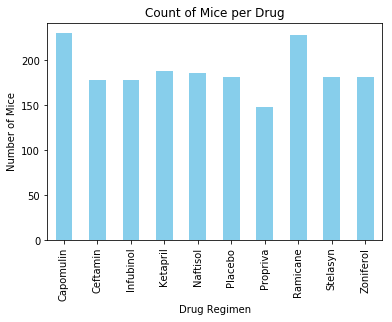

In [26]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_treat = new_df.groupby(['Drug Regimen']).count()['Mouse ID']
mice_treat.plot(kind='bar', color='skyblue')
plt.ylabel('Number of Mice')
plt.title('Count of Mice per Drug')
plt.show()


Text(0, 0.5, 'Number of Mice')

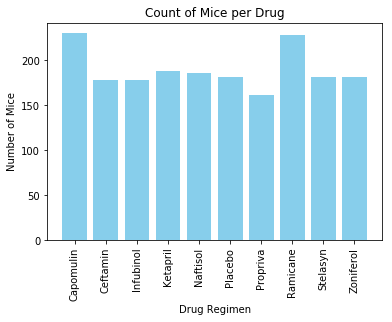

In [32]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
data = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(data))

plt.bar(x_axis, data, color='skyblue')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')


plt.title("Count of Mice per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

## Pie Plots

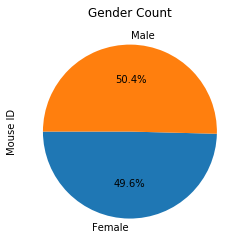

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pd_gender_count = new_df.groupby('Sex').nunique()['Mouse ID']
pd_gender_count.plot(kind='pie', autopct='%1.1f%%', startangle=180)
plt.title('Gender Count')
plt.show()


Text(0.5, 1.0, 'Gender Count')

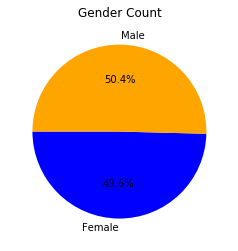

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = new_df.groupby('Sex').nunique()['Mouse ID']
values = gender_count
labels = ['Female', 'Male']
colors = ['blue', 'orange']
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=180)
plt.title('Gender Count')

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
top_four = new_df[new_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
top_four = top_four.sort_values(['Timepoint'], ascending=True)

top_four_data = top_four[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
top_four_data.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.0
1391,Infubinol,q132,0,45.0
195,Capomulin,i738,0,45.0
205,Ramicane,a520,0,45.0
1370,Ceftamin,p438,0,45.0


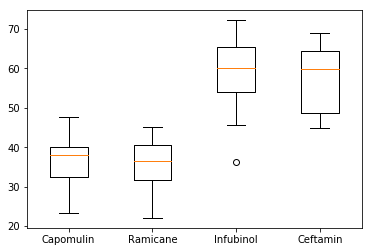

In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
top_sort = top_four_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
top_df = top_sort.to_frame()

top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']


final_df = top_df.reset_index()
drug_vol = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
drug_vol_df = pd.DataFrame(drug_vol)
drug_vol_df = drug_vol_df.reindex(top_4)
tumor_vols = [vol for vol in drug_vol_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.show()

## Line and Scatter Plots

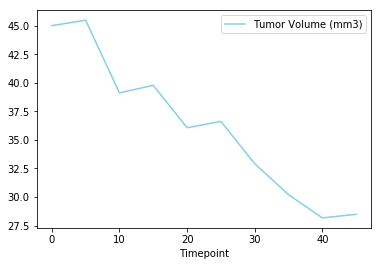

In [50]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
a_mouse = new_df.loc[df['Mouse ID'] == 'x401']
x401 = a_mouse.loc[:, ['Timepoint', 'Tumor Volume (mm3)']]
x401.set_index('Timepoint').plot(color='skyblue')

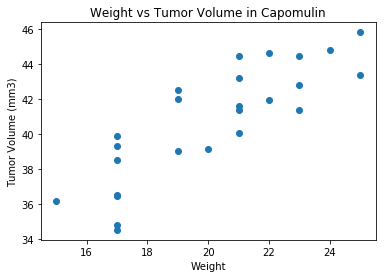

In [49]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_weight = df.loc[df['Drug Regimen'] == 'Capomulin']
capo_avg = capo_weight.groupby(['Mouse ID']).mean()

plt.scatter(capo_avg['Weight (g)'], capo_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight vs Tumor Volume in Capomulin')
plt.show()


## Correlation and Regression

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capo_avg.iloc[:,0]
tumor_vol = capo_avg.iloc[:,1]
correlate = st.pearsonr(mouse_weight, tumor_vol)
print(f'The correlation between both factors is {round(correlate[0],2)}')

The correlation between both factors is -0.07
